# Lab #5

In today's lab we'll extend what we've learned so far on RNNs:

  1. Learning our own word embeddings
  2. Improving performance by using `LSTM` and `GRU` layers
  3. Mitigating overfitting by adding recurrent dropout
  4. Improving performance by adding more layers
  5. Improving performance by using a `Bidirectional` layer


In [1]:
# Import needed packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import keras
from tensorflow.keras import backend as K
from keras import datasets, layers, models, preprocessing
from keras.preprocessing import sequence
from keras.datasets import reuters
from keras.utils import to_categorical

Today we'll be working with the [Reuters dataset,](https://faroit.com/keras-docs/1.2.2/datasets/#reuters-newswire-topics-classification) a set of short newswires and their topics, published by Reuters in 1986 that is built-in to Keras and can be loaded similarly to the IMDb dataset. This dataset contains 11,228 newswires from Reuters, labeled over 46 topics. As with the IMDb dataset, each wire is encoded as a sequence of word indexes and each label is an integer number from 1 to 46.

Use the code below to load the data. Here we have chosen the number of words in our dictionary to be 10,000 (just like we did with the IMDb dataset) and the maximum length of a message to be 500 words. Any newswires shorter than 500 words will be padded with 0s and any newswires longer than 500 words will be truncated to the first 500 words. We use the `to_categorical` function to transform the y values from a single interger between 1 and 46 (indicating which of the 46 classes the message has been labeled as) to a vector of length 46 with a 1 in the position associated with the integer label and the rest 0s. 

In [2]:
# Load data
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words = 10000)

x_train = sequence.pad_sequences(x_train, maxlen = 500)
x_test = sequence.pad_sequences(x_test, maxlen = 500)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

# One hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

2113536/2110848 [==============================] - 0s 0us/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


x_train shape: (8982, 500)
x_test shape: (2246, 500)


## Question 1

Create an RNN with an `Embedding` layer, 2 `SimpleRNN` layers, and an output layer. Remember that you are performing multiclass classification with 46 total classes. You can choose the number of nodes for each layer and the length of the embedding vector.

In [3]:
model = keras.Sequential([
  layers.Embedding(10000, 64),
  layers.SimpleRNN(64, return_sequences=True),
  layers.SimpleRNN(64),
  layers.Dense(46, activation = 'softmax')
])

Compile and train the model for 10 `epochs` with a `batch_size` of 128 and a `validation_split` of 0.3 (use 30% of the training set for the validation set). 

In [4]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])


history = model.fit(x_train, y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_split = 0.3)

Epoch 1/10
50/50 [==============================] - 30s 553ms/step - loss: 3.0228 - accuracy: 0.2312 - val_loss: 2.3733 - val_accuracy: 0.3532
Epoch 2/10
50/50 [==============================] - 28s 553ms/step - loss: 2.2848 - accuracy: 0.4003 - val_loss: 2.0541 - val_accuracy: 0.4954
Epoch 3/10
50/50 [==============================] - 27s 544ms/step - loss: 1.8307 - accuracy: 0.5312 - val_loss: 2.0412 - val_accuracy: 0.4794
Epoch 4/10
50/50 [==============================] - 28s 561ms/step - loss: 1.3460 - accuracy: 0.6867 - val_loss: 2.1180 - val_accuracy: 0.4564
Epoch 5/10
50/50 [==============================] - 28s 558ms/step - loss: 0.9615 - accuracy: 0.7729 - val_loss: 2.1428 - val_accuracy: 0.4935
Epoch 6/10
50/50 [==============================] - 27s 550ms/step - loss: 0.7470 - accuracy: 0.8209 - val_loss: 2.2898 - val_accuracy: 0.5232
Epoch 7/10
50/50 [==============================] - 27s 550ms/step - loss: 0.5661 - accuracy: 0.8770 - val_loss: 2.4395 - val_accuracy: 0.4571

Plot the loss and accuracy for the training and validation sets. 
Is there evidence of overfitting? 

Answer: Yes, there is evidence of overfitting almost immediately.

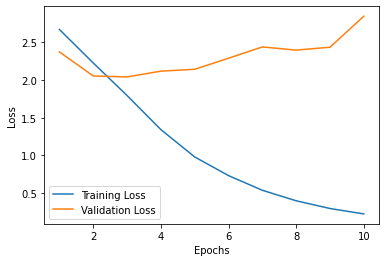

In [5]:
import seaborn as sns

train_acc  = history.history['accuracy']
train_loss = history.history['loss']
val_acc  = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label = 'Training Loss')
plt.plot(epochs, val_loss, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

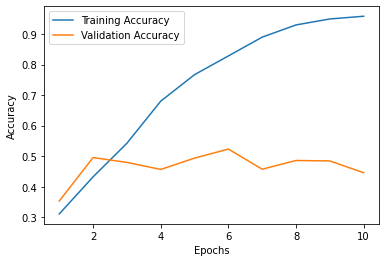

In [6]:
plt.plot(epochs, train_acc, label = 'Training Accuracy')
plt.plot(epochs, val_acc, label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## Question 2

Now fit the same model as above but with 2 `LSTM` layers instead of `SimpleRNN` layers.

In [4]:
model = keras.Sequential([
  layers.Embedding(10000, 64),
  layers.LSTM(64, return_sequences=True),
  layers.LSTM(64),
  layers.Dense(46, activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])


history = model.fit(x_train, y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_split = 0.3)

Epoch 1/10
50/50 [==============================] - 63s 1s/step - loss: 2.8862 - accuracy: 0.3170 - val_loss: 2.2836 - val_accuracy: 0.4245
Epoch 2/10
50/50 [==============================] - 62s 1s/step - loss: 2.1001 - accuracy: 0.4813 - val_loss: 1.8715 - val_accuracy: 0.5024
Epoch 3/10
50/50 [==============================] - 62s 1s/step - loss: 1.8249 - accuracy: 0.5212 - val_loss: 1.6580 - val_accuracy: 0.5725
Epoch 4/10
50/50 [==============================] - 62s 1s/step - loss: 1.6582 - accuracy: 0.5637 - val_loss: 1.5998 - val_accuracy: 0.5748
Epoch 5/10
50/50 [==============================] - 62s 1s/step - loss: 1.5761 - accuracy: 0.5810 - val_loss: 1.8619 - val_accuracy: 0.5640
Epoch 6/10
50/50 [==============================] - 62s 1s/step - loss: 1.4983 - accuracy: 0.6025 - val_loss: 1.6635 - val_accuracy: 0.5826
Epoch 7/10
50/50 [==============================] - 62s 1s/step - loss: 1.3648 - accuracy: 0.6413 - val_loss: 1.5226 - val_accuracy: 0.6093
Epoch 8/10
50/50 [==

Plot the loss and accuracy for the training and validation sets. 
Is there evidence of overfitting? Has the performance of the model improved?

Answer: No, it seems the overfitting has been corrected. Yes, the validation accuracy has improved by almost 10% at its highest value.

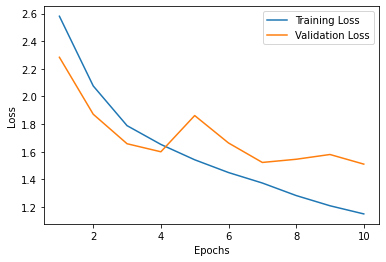

In [5]:
train_acc  = history.history['accuracy']
train_loss = history.history['loss']
val_acc  = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label = 'Training Loss')
plt.plot(epochs, val_loss, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

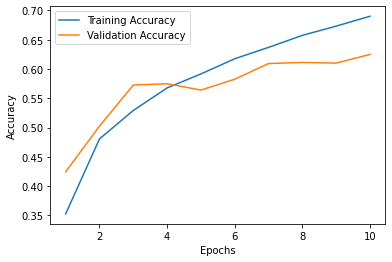

In [6]:
plt.plot(epochs, train_acc, label = 'Training Accuracy')
plt.plot(epochs, val_acc, label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## Question 3

Now fit the same model as above but with 2 `GRU` layers rather than 2 `LSTM` layers.

In [7]:
model = keras.Sequential([
  layers.Embedding(10000, 64),
  layers.GRU(64, return_sequences=True),
  layers.GRU(64),
  layers.Dense(46, activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])


history = model.fit(x_train, y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_split = 0.3)

Epoch 1/10
50/50 [==============================] - 53s 991ms/step - loss: 2.8315 - accuracy: 0.3399 - val_loss: 2.5640 - val_accuracy: 0.3544
Epoch 2/10
50/50 [==============================] - 53s 1s/step - loss: 2.0177 - accuracy: 0.4630 - val_loss: 1.8488 - val_accuracy: 0.5024
Epoch 3/10
50/50 [==============================] - 52s 1s/step - loss: 1.8196 - accuracy: 0.4943 - val_loss: 1.7617 - val_accuracy: 0.5258
Epoch 4/10
50/50 [==============================] - 53s 1s/step - loss: 1.6795 - accuracy: 0.5361 - val_loss: 1.7859 - val_accuracy: 0.5195
Epoch 5/10
50/50 [==============================] - 53s 1s/step - loss: 1.5582 - accuracy: 0.5532 - val_loss: 1.7161 - val_accuracy: 0.5481
Epoch 6/10
50/50 [==============================] - 53s 1s/step - loss: 1.6123 - accuracy: 0.5599 - val_loss: 1.7769 - val_accuracy: 0.5425
Epoch 7/10
50/50 [==============================] - 52s 1s/step - loss: 1.4659 - accuracy: 0.5866 - val_loss: 1.9323 - val_accuracy: 0.5058
Epoch 8/10
50/50 

Plot the loss and accuracy for the training and validation sets. 
Is there evidence of overfitting? Has the performance of the model improved?

Answer: Yes, there is evidence of overfitting but it is delayed by a few epochs. The performance is better than the original model but not as good as the `LSTM` model. This makes sense - LSTM is known to have better performance, especially for longer sequences. 

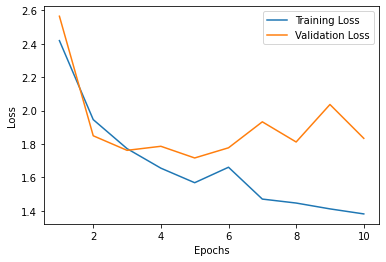

In [8]:
train_acc  = history.history['accuracy']
train_loss = history.history['loss']
val_acc  = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label = 'Training Loss')
plt.plot(epochs, val_loss, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

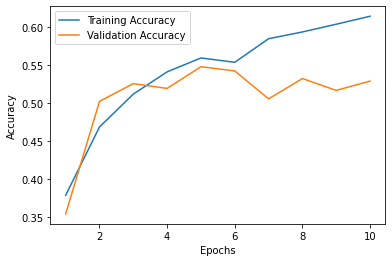

In [9]:
plt.plot(epochs, train_acc, label = 'Training Accuracy')
plt.plot(epochs, val_acc, label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## Question 4

Using the same model as in question 3, try adding `dropout` and `recurrent_dropout` arguments to the first `GRU` layer. Chose whatever level of dropout you prefer for each type of dropout. 

In [10]:
model = keras.Sequential([
  layers.Embedding(10000, 64),
  layers.GRU(64, return_sequences=True,
             dropout = 0.2,
             recurrent_dropout=0.2),
  layers.GRU(64),
  layers.Dense(46, activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])


history = model.fit(x_train, y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_split = 0.3)

Epoch 1/10
50/50 [==============================] - 80s 2s/step - loss: 2.8879 - accuracy: 0.3208 - val_loss: 2.3330 - val_accuracy: 0.3592
Epoch 2/10
50/50 [==============================] - 78s 2s/step - loss: 2.0085 - accuracy: 0.4429 - val_loss: 2.2018 - val_accuracy: 0.3781
Epoch 3/10
50/50 [==============================] - 78s 2s/step - loss: 1.8428 - accuracy: 0.4919 - val_loss: 1.8031 - val_accuracy: 0.5191
Epoch 4/10
50/50 [==============================] - 78s 2s/step - loss: 1.6973 - accuracy: 0.5298 - val_loss: 1.7329 - val_accuracy: 0.5425
Epoch 5/10
50/50 [==============================] - 78s 2s/step - loss: 1.6189 - accuracy: 0.5509 - val_loss: 2.0279 - val_accuracy: 0.5065
Epoch 6/10
50/50 [==============================] - 78s 2s/step - loss: 1.5960 - accuracy: 0.5571 - val_loss: 1.8403 - val_accuracy: 0.5072
Epoch 7/10
50/50 [==============================] - 78s 2s/step - loss: 1.4947 - accuracy: 0.5880 - val_loss: 1.8724 - val_accuracy: 0.5117
Epoch 8/10
50/50 [==

Plot the loss and accuracy for the training and validation sets. 
Is there evidence of overfitting? Has the performance of the model improved?

Answer: Yes, there is evidence of overfitting and it is similar to the previous model. The performance did not improve. 

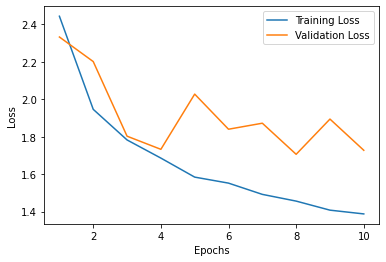

In [11]:
train_acc  = history.history['accuracy']
train_loss = history.history['loss']
val_acc  = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label = 'Training Loss')
plt.plot(epochs, val_loss, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

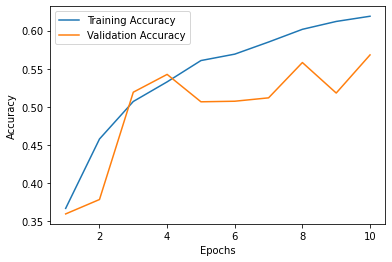

In [12]:
plt.plot(epochs, train_acc, label = 'Training Accuracy')
plt.plot(epochs, val_acc, label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## Question 5

Let's try to improve accuracy by increasing the complexity of the model. Add a third `GRU` layer to your model from Question 4 and train the model.

In [3]:
model = keras.Sequential([
  layers.Embedding(10000, 64),
  layers.GRU(64, return_sequences=True,
             dropout = 0.2,
             recurrent_dropout=0.2),
  layers.GRU(64, return_sequences=True),
  layers.GRU(64),
  layers.Dense(46, activation = 'softmax')
])

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])


history = model.fit(x_train, y_train,
                    epochs = 10,
                    batch_size = 128,
                    validation_split = 0.3)

Epoch 1/10
50/50 [==============================] - 117s 2s/step - loss: 2.8092 - accuracy: 0.3405 - val_loss: 2.0916 - val_accuracy: 0.3774
Epoch 2/10
50/50 [==============================] - 114s 2s/step - loss: 1.9792 - accuracy: 0.4567 - val_loss: 1.8968 - val_accuracy: 0.4542
Epoch 3/10
50/50 [==============================] - 114s 2s/step - loss: 1.7577 - accuracy: 0.5084 - val_loss: 1.7937 - val_accuracy: 0.5065
Epoch 4/10
50/50 [==============================] - 114s 2s/step - loss: 1.6614 - accuracy: 0.5398 - val_loss: 1.7032 - val_accuracy: 0.5432
Epoch 5/10
50/50 [==============================] - 113s 2s/step - loss: 1.5513 - accuracy: 0.5770 - val_loss: 1.7098 - val_accuracy: 0.5547
Epoch 6/10
50/50 [==============================] - 113s 2s/step - loss: 1.5055 - accuracy: 0.5846 - val_loss: 1.7910 - val_accuracy: 0.5124
Epoch 7/10
50/50 [==============================] - 115s 2s/step - loss: 1.4260 - accuracy: 0.6119 - val_loss: 1.7651 - val_accuracy: 0.5395
Epoch 8/10
50

Plot the loss and accuracy for the training and validation sets. 
Is there evidence of overfitting? Has the performance of the model improved?

Answer: Yes, there is still evidence of overfitting but it is much less than previous models. There doesn't seem to be any improvement in performance. 

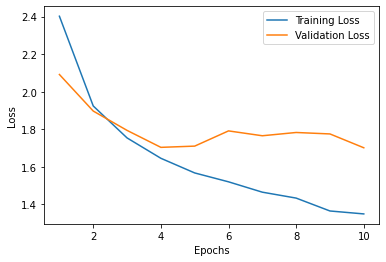

In [4]:
train_acc  = history.history['accuracy']
train_loss = history.history['loss']
val_acc  = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label = 'Training Loss')
plt.plot(epochs, val_loss, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

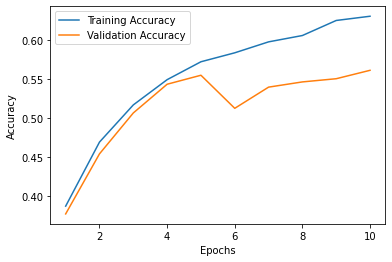

In [5]:
plt.plot(epochs, train_acc, label = 'Training Accuracy')
plt.plot(epochs, val_acc, label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## Question 6

Let's see if using a bidirectional RNN will increase performance. Create a model similar to your `LSTM` model in Question 2, but with 1 bidirectional LSTM later. 

In [13]:
model = keras.Sequential([
  layers.Embedding(10000, 64),
  layers.Bidirectional(layers.LSTM(64)),

  layers.Dense(46, activation = 'softmax')
])

model.compile(optimizer = 'rmsprop', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

history = model.fit(x_train, y_train, 
                    epochs = 10, 
                    batch_size = 128, 
                    validation_split = 0.3)

Epoch 1/10
50/50 [==============================] - 59s 1s/step - loss: 2.8512 - accuracy: 0.3356 - val_loss: 2.0376 - val_accuracy: 0.4902
Epoch 2/10
50/50 [==============================] - 55s 1s/step - loss: 2.0406 - accuracy: 0.4782 - val_loss: 1.7929 - val_accuracy: 0.5365
Epoch 3/10
50/50 [==============================] - 55s 1s/step - loss: 1.7797 - accuracy: 0.5394 - val_loss: 1.6706 - val_accuracy: 0.5655
Epoch 4/10
50/50 [==============================] - 55s 1s/step - loss: 1.6637 - accuracy: 0.5734 - val_loss: 1.9483 - val_accuracy: 0.4152
Epoch 5/10
50/50 [==============================] - 55s 1s/step - loss: 1.6868 - accuracy: 0.5529 - val_loss: 1.8530 - val_accuracy: 0.4735
Epoch 6/10
50/50 [==============================] - 54s 1s/step - loss: 1.6275 - accuracy: 0.5787 - val_loss: 1.8388 - val_accuracy: 0.4980
Epoch 7/10
50/50 [==============================] - 55s 1s/step - loss: 1.5442 - accuracy: 0.6008 - val_loss: 1.6297 - val_accuracy: 0.5796
Epoch 8/10
50/50 [==

Plot the loss and accuracy for the training and validation sets. 
Is there evidence of overfitting? Has the performance of the model improved?

Answer: It looks like the model isn't overfitting and there is a slight gain in performance, but it is volatile and bounces around between epochs. 

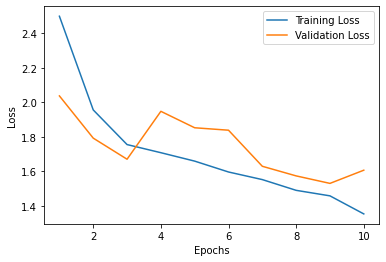

In [14]:
train_acc  = history.history['accuracy']
train_loss = history.history['loss']
val_acc  = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, label = 'Training Loss')
plt.plot(epochs, val_loss, label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

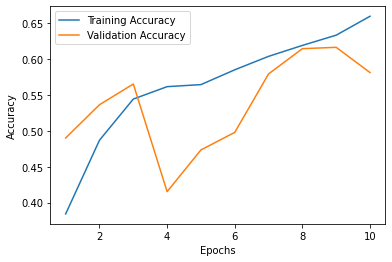

In [15]:
plt.plot(epochs, train_acc, label = 'Training Accuracy')
plt.plot(epochs, val_acc, label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## Question 7

Which model would you choose for this task? Why did you choose that model?

Answer: The `LSTM` model because it has the least evidence of overfitting and has the best performance of all the models. We would probably want to add another `LSTM` layer to see if we could improve performance. 